# Lab-2.1: Assignment
`Gathering text data with an API`

**IMPORTANT:** The lab shown here (on the website) is just an HTML version, included for reference. To download the assignment, please navigate to the Labs tab in the Share-point dropdown menu in the website’s navigation bar. The relevant assignment can be determined from the folder’s name, click on the three dots & select download to get the assignment.

**NOTE**: It is recommended that you complete this `.ipynb` file in VS-code. 

`Submission:`

* Export the completed assignment to HTML or PDF (preferably with Quarto) and upload it to Canvas.
* The final uploaded version should NOT have any code-errors present
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Assignment-1: 

* Read over the `News-API`, `Wikipedia API`, and `Google Scholar` API sections in the lab-demonstration section, if you have not done so already. 
  * [https://jfh.georgetown.domains/dsan5000/](https://jfh.georgetown.domains/dsan5000/)
* Get an API key for the `News-API`: [see following link](https://newsapi.org/docs/get-started)
* **Submission**: Insert your API key below 

In [1]:
API_KEY='9cf6d393469e41738d84303a9c840fd1'

## Assignment-2: 

* Use the provided `News-API` code as a starting point 
* Select `THREE` random topics (e.g. Georgetown, Cats, Clouds) but choose whatever you like 
* Query the API to pull text data and store the results in three different dictionaries 
* Extract the `title` and `description` text and store for later processing (up to you how you do this)
* Clean the text as needed 

In [2]:
# Import
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Set credentials 
baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True

# THIS CODE WILL NOT WORK UNLESS YOU INSERT YOUR API KEY IN THE NEXT LINE
API_KEY='9cf6d393469e41738d84303a9c840fd1'


In [14]:
TOPICS = ['Cardiovascular']

In [7]:
def extract (x):

    URLpost = {'apiKey': API_KEY,
                'q': '+'+ TOPICS[x],
                'sortBy': 'relevancy',
                'totalRequests': 1}

    # print(baseURL)
    # print(URLpost)

    #GET DATA FROM API
    response = requests.get(baseURL, URLpost) #request data from the server
    # print(response.url);  
    response = response.json() #extract txt data from request into json

    # PRETTY PRINT
    # https://www.digitalocean.com/community/tutorials/python-pretty-print-json

    # print(json.dumps(response, indent=2))

    # #GET TIMESTAMP FOR PULL REQUEST
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")

    # SAVE TO FILE 
    with open(timestamp+'-newapi-raw-data.json', 'w') as outfile:
        json.dump(response, outfile, indent=4)
        
    return response



In [15]:
response1 = extract(0)

In [9]:
# Utility function
# Function to clean strings
def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

In [10]:
def clean (response):
    article_list=response['articles']   #list of dictionaries for each article
    article_keys=article_list[0].keys()
    # print("AVAILABLE KEYS:")
    # print(article_keys)
    index=0
    cleaned_data=[];  
    for article in article_list:
        tmp=[]
        # if(verbose):
        #     print("#------------------------------------------")
        #     print("#",index)
        #     print("#------------------------------------------")

        for key in article_keys:
            # if(verbose):
            #     print("----------------")
            #     print(key)
            #     print(article[key])
            #     print("----------------")

            # if(key=='source'):
            #     src=string_cleaner(article[key]['name'])
            #     tmp.append(src) 

            # if(key=='author'):
            #     author=string_cleaner(article[key])
            #     #ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
            #     if(src in author): 
            #         print(" AUTHOR ERROR:",author);author='NA'
            #     tmp.append(author)

            if(key=='title'):
                tmp.append(string_cleaner(article[key]))
                
            if(key=='description'):
                tmp.append(string_cleaner(article[key]))

            # if(key=='content'):
            #     tmp.append(string_cleaner(article[key]))

            # if(key=='publishedAt'):
            #     #DEFINE DATA PATERN FOR RE TO CHECK  .* --> wildcard
            #     ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            #     date=article[key]
            #     if(not ref.match(date)):
            #         print(" DATE ERROR:",date); date="NA"
            #     tmp.append(date)

        cleaned_data.append(tmp)
        index+=1

    return cleaned_data

In [16]:
# Create DataFrame
cleaned_data1 = clean(response1)
df1 = pd.DataFrame(cleaned_data1)




In [17]:

df1['t'] = df1[0] + df1[1]
t1=""
for i in range(len(df1)):
    t1 += df1['t'][i]


## Assignment-3: 

* Use the provided `Wikipedia-API` code as a starting point 
* For EACH `THREE` of the random topics, create a word cloud for your cleaned  `title` and `description` text 

In [18]:
import wikipedia

def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()



In [21]:
df1.to_csv('../../data/00-raw-data/cardiorisk.csv')

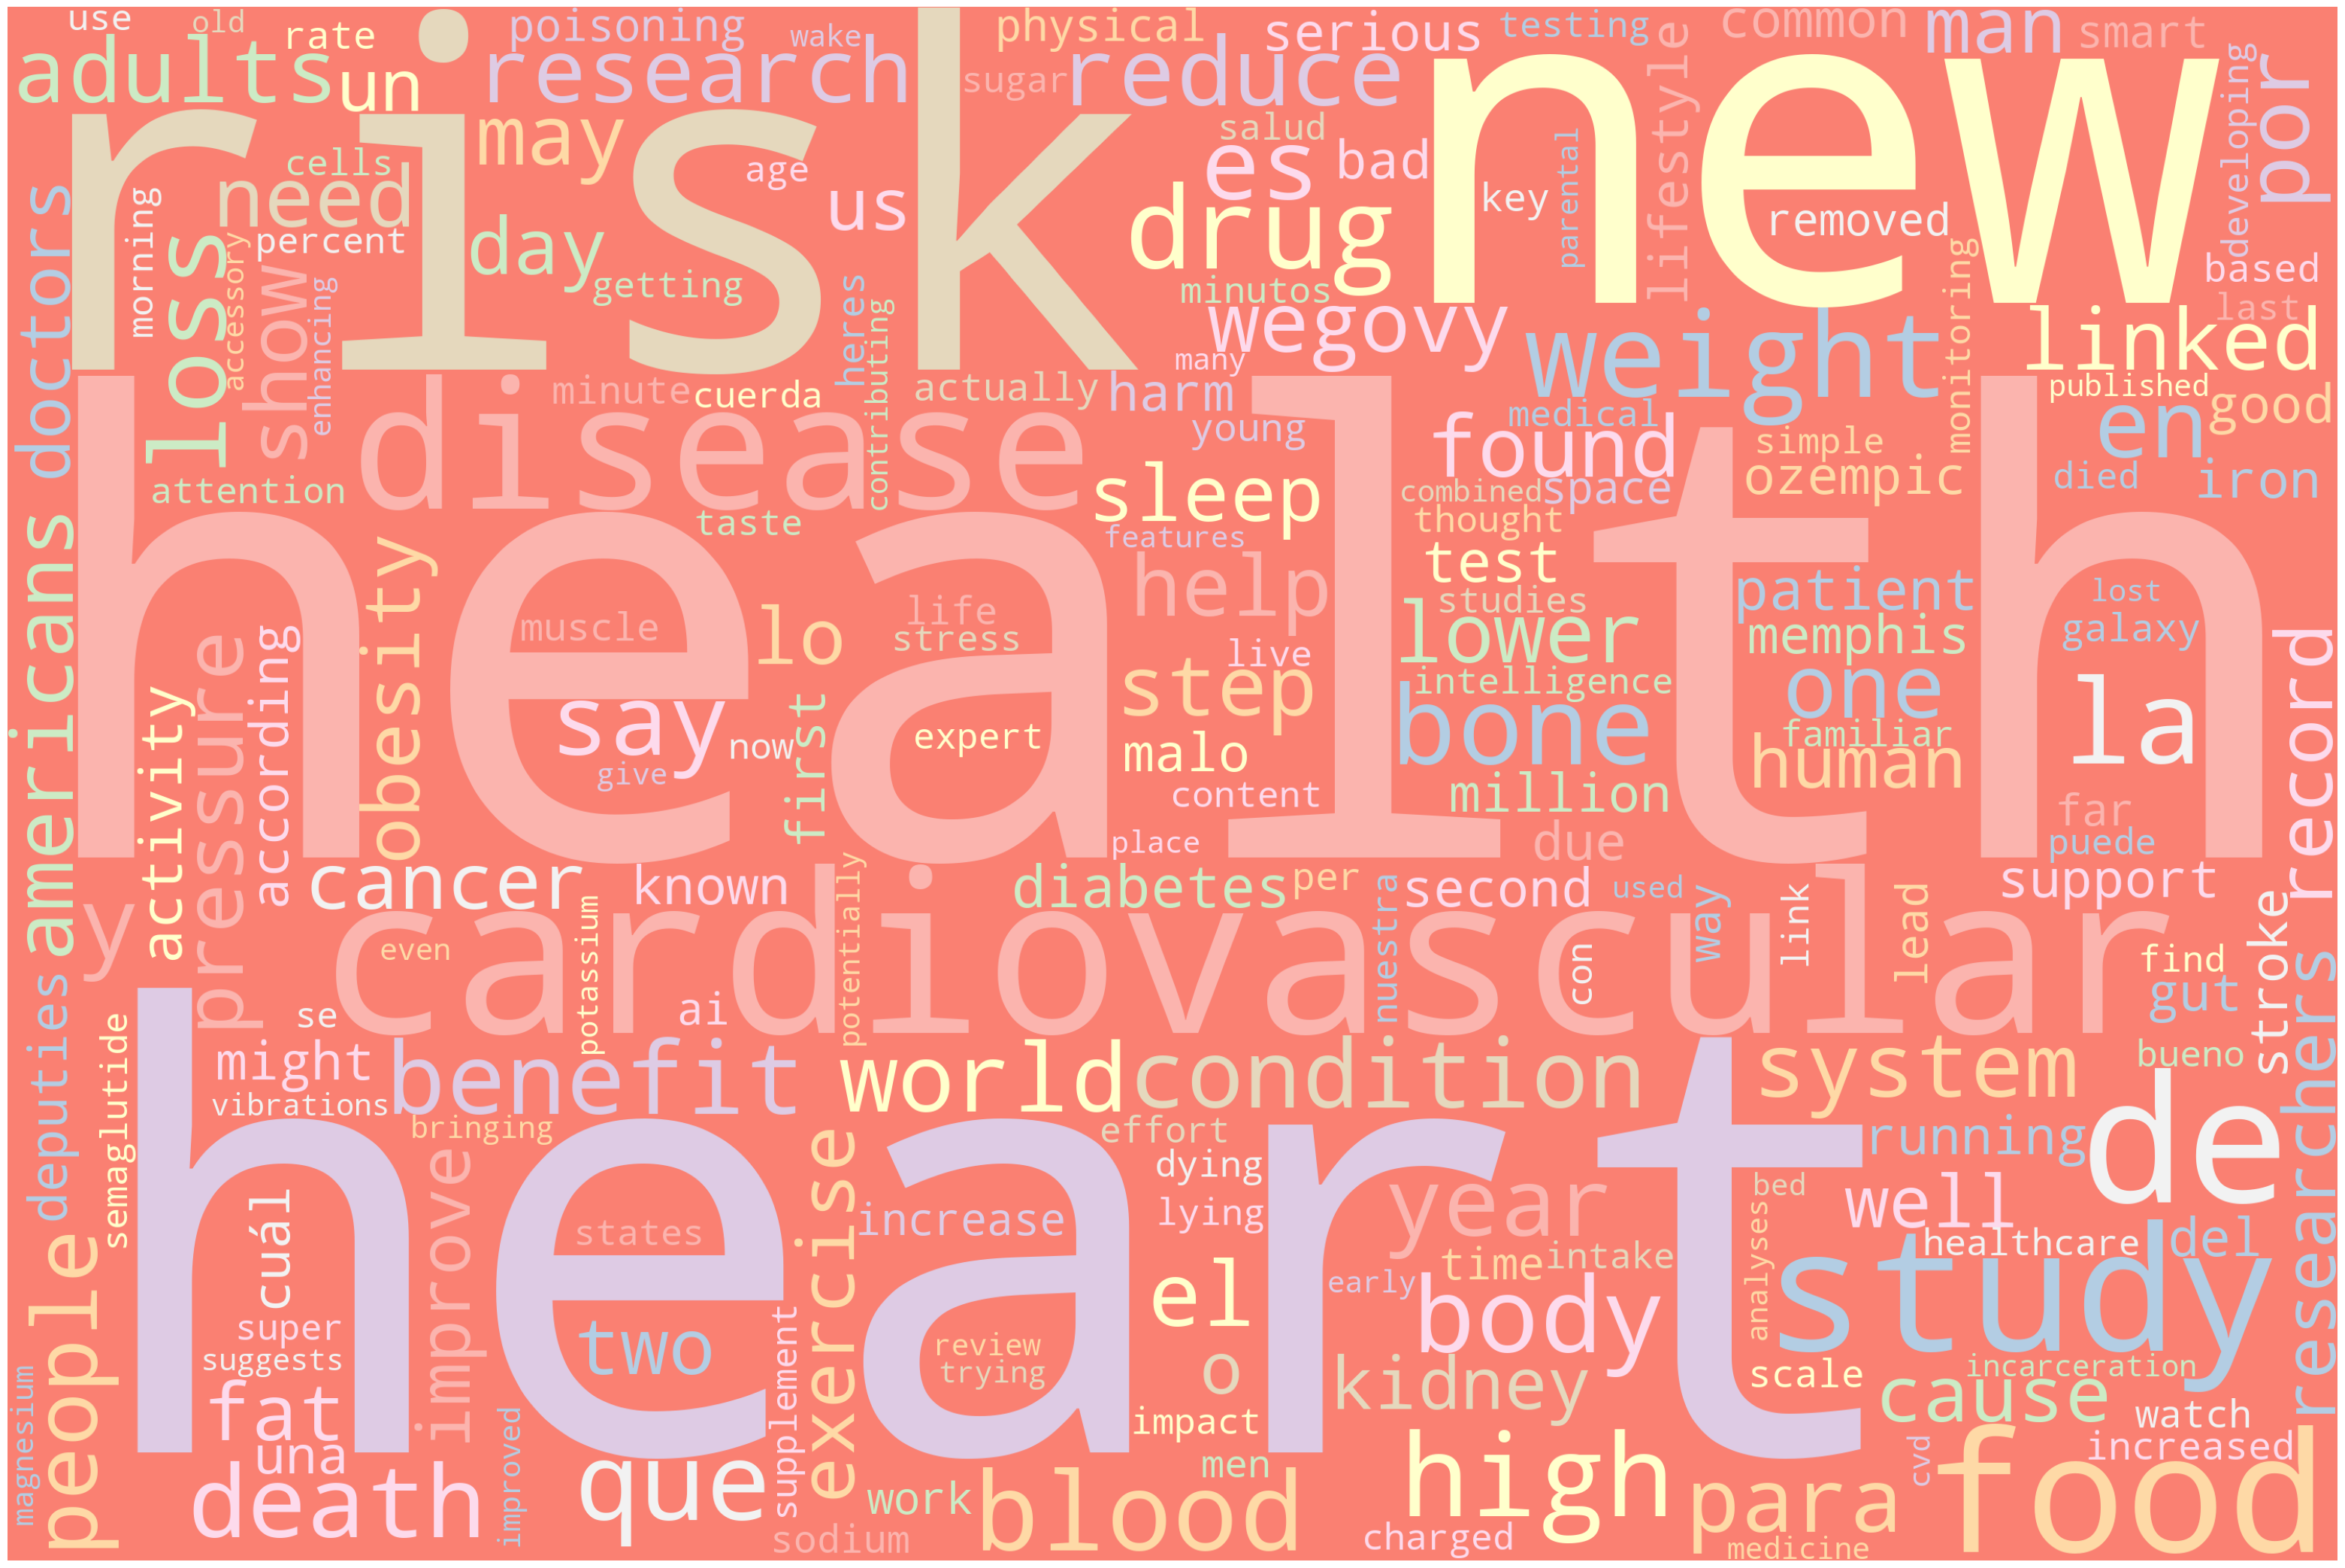

In [19]:
generate_word_cloud(t1)